In [1]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 10.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer
config = Cfg.load_config_from_name('vgg_transformer')

In [3]:
! wget https://vocr.vn/data/vietocr/data_line.zip
! unzip -qq -o ./data_line.zip

--2023-04-21 13:21:07--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  6.53MB/s    in 15s     

2023-04-21 13:21:24 (3.99 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [5]:
config = Cfg.load_config_from_name('vgg_transformer')
dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000,
          'iters': 16000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [6]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 16000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

In [8]:
trainer = Trainer(config, pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:06<00:00, 91.0MB/s]
18533it [00:27, 684.60it/s] 
Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:03<00:00, 1650.46it/s]

Created dataset with 5482 samples



train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 144206.66it/s]
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1336.66it/s]


Created dataset with 1812 samples


valid_hw build cluster: 100%|████████████████████████████████| 1812/1812 [00:00<00:00, 83284.88it/s]


In [9]:
trainer.config.save('config.yml')

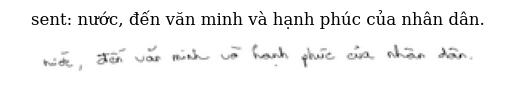

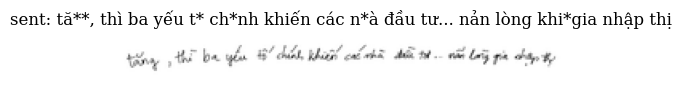

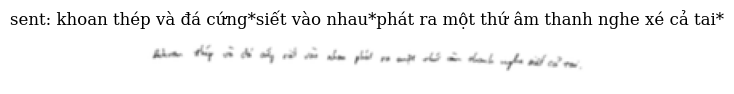

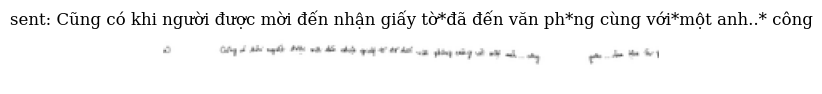

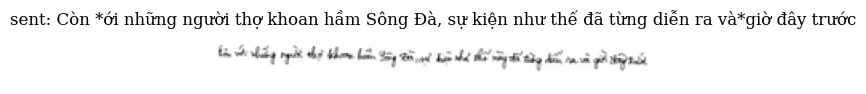

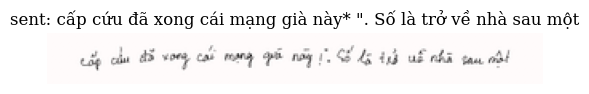

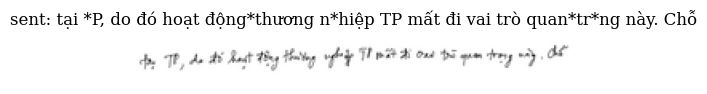

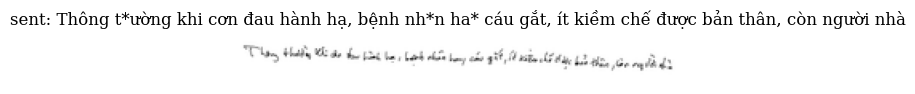

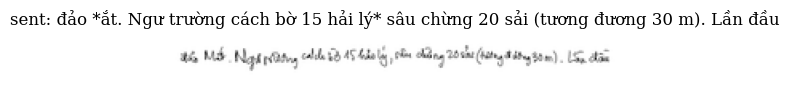

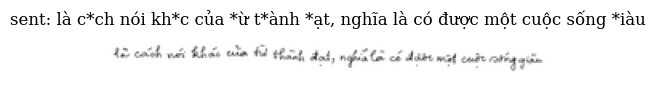

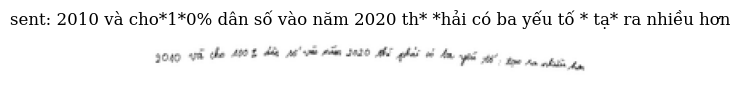

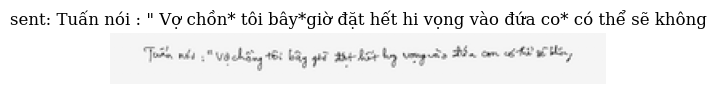

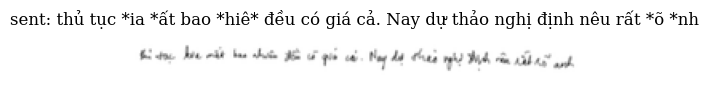

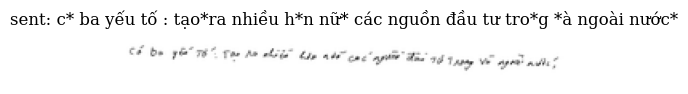

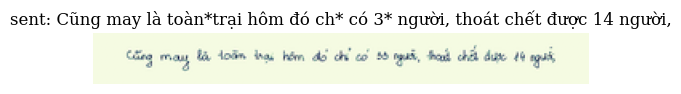

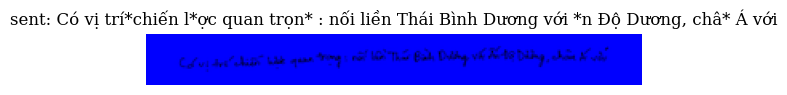

In [10]:
trainer.visualize_dataset()

In [11]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


iter: 000200 - train loss: 1.610 - lr: 2.30e-05 - load time: 1.72 - gpu time: 82.97
iter: 000400 - train loss: 1.347 - lr: 5.42e-05 - load time: 1.32 - gpu time: 83.65
iter: 000600 - train loss: 1.221 - lr: 1.01e-04 - load time: 1.28 - gpu time: 84.35
iter: 000800 - train loss: 1.128 - lr: 1.56e-04 - load time: 1.76 - gpu time: 84.93
iter: 001000 - train loss: 1.071 - lr: 2.11e-04 - load time: 1.33 - gpu time: 84.31
iter: 001200 - train loss: 1.032 - lr: 2.58e-04 - load time: 1.29 - gpu time: 85.50
iter: 001400 - train loss: 0.992 - lr: 2.89e-04 - load time: 2.42 - gpu time: 85.34
iter: 001600 - train loss: 0.959 - lr: 3.00e-04 - load time: 1.31 - gpu time: 83.88
iter: 001800 - train loss: 0.938 - lr: 3.00e-04 - load time: 1.20 - gpu time: 84.18
iter: 002000 - train loss: 0.917 - lr: 2.99e-04 - load time: 1.32 - gpu time: 85.10
iter: 002200 - train loss: 0.901 - lr: 2.99e-04 - load time: 1.84 - gpu time: 84.79
iter: 002400 - train loss: 0.878 - lr: 2.98e-04 - load time: 1.40 - gpu time

In [19]:
config['weights'] = './weights/transformerocr.pth'

In [20]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 16000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

'Chọn một bạn nam làm lớp trưởng.'

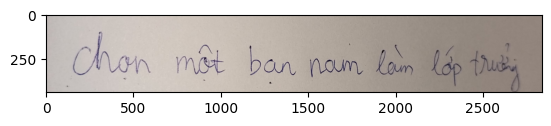

In [25]:
detector = Predictor(config)
img = './sample2.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


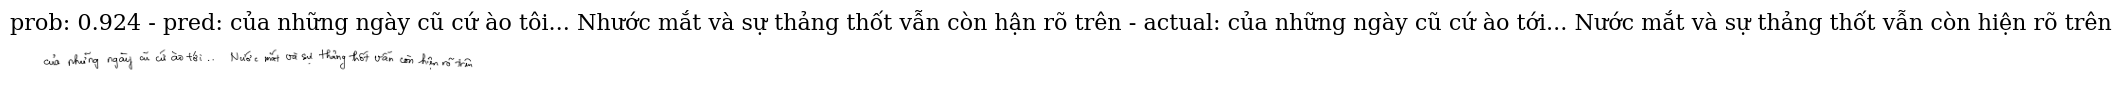

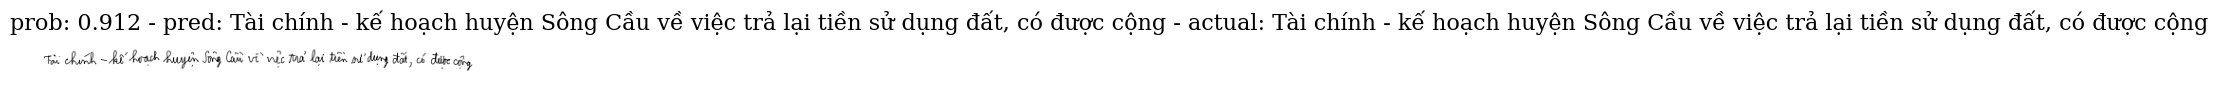

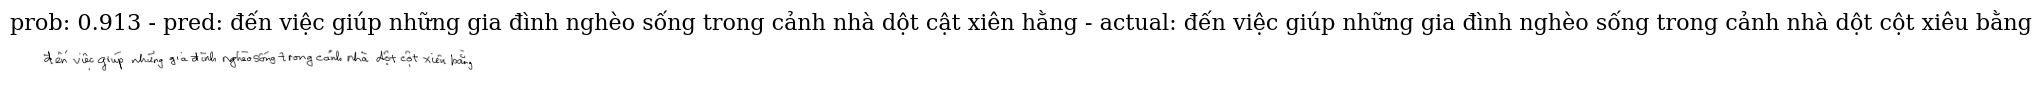

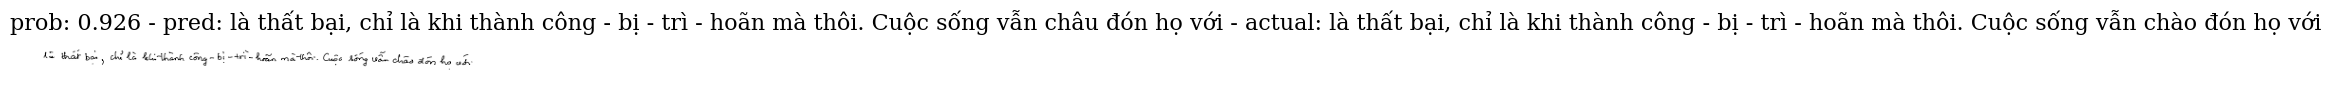

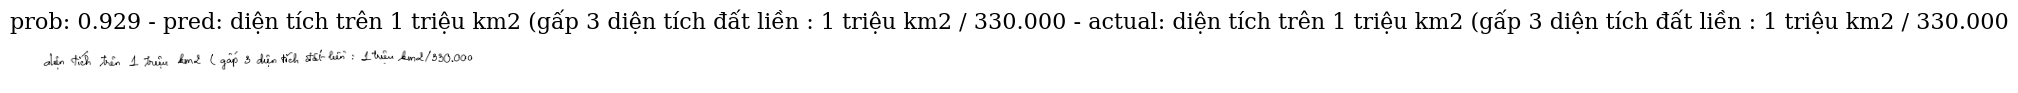

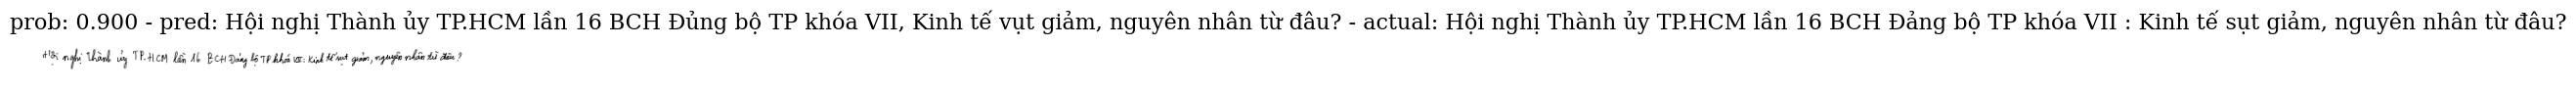

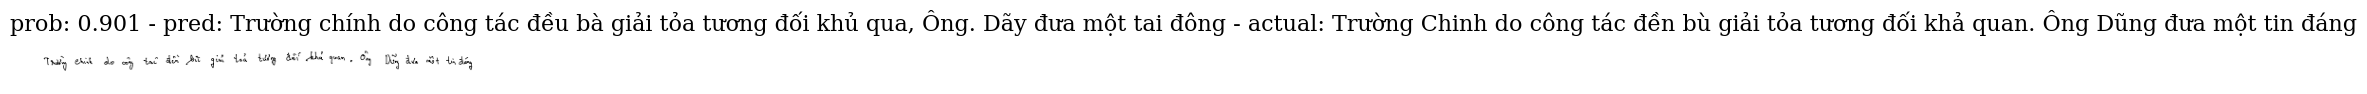

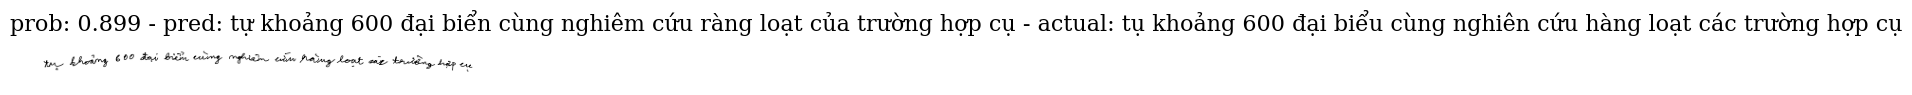

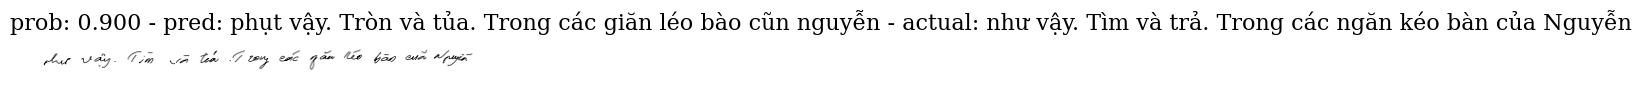

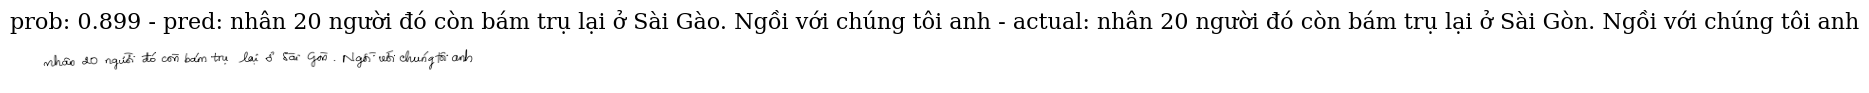

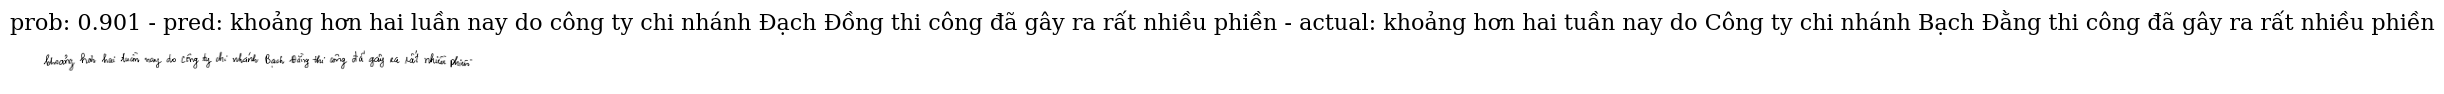

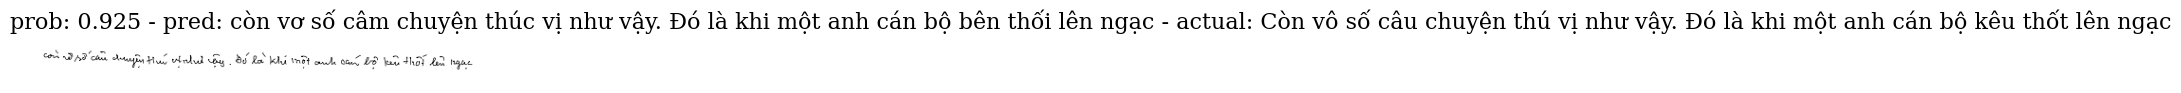

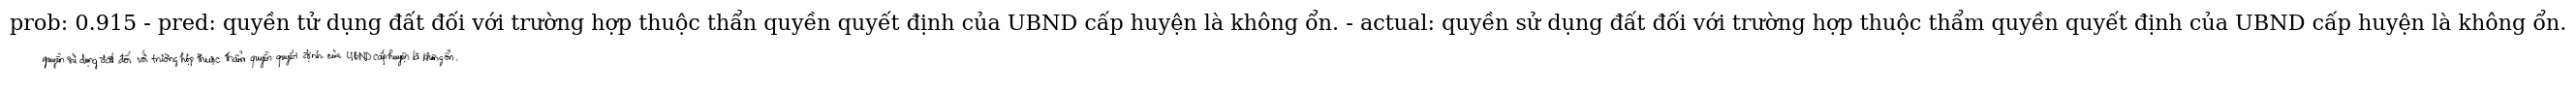

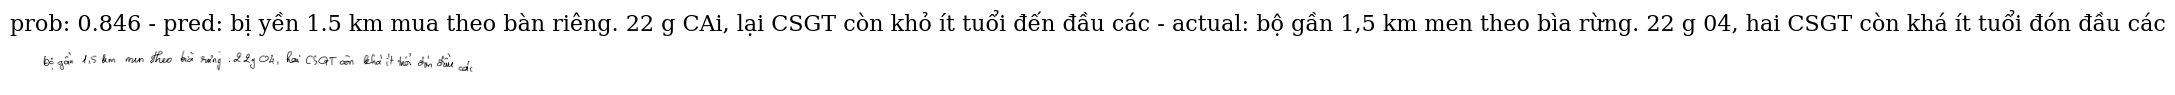

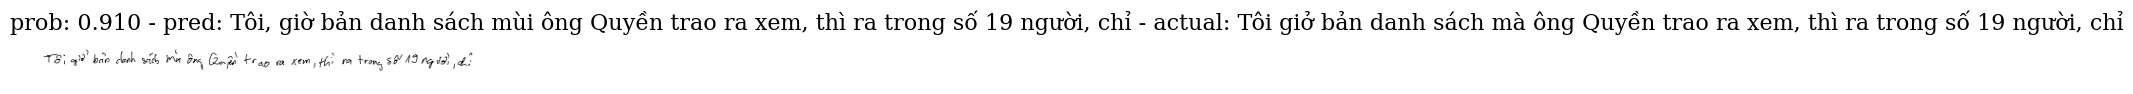

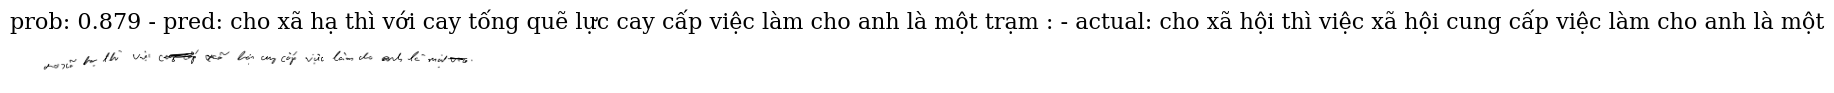

In [26]:
trainer.visualize_prediction()